# Overview: In this notebook we outline sample level QC after reanalzying the IHC LUAD dataset generated by Sorin et al. 2023.

## This notebook describes running the multi-sample Tessera pipeline on the LUAD IHC dataset.

### Workflow:
1. Run Tessera for each sample.
2. Aggregate results. 
3. Cluster tiles.
4. Look at enriched cell types across Tessera tile types.

In [2]:
suppressPackageStartupMessages({
    library(cygnus)
    library(Matrix)
    library(dplyr)
    library(data.table)
    library(purrr)
    library(RSpectra)
    library(sf)
    library(mclust)
    library(ggthemes)
    library(viridis)
    library(glue)
    library(patchwork)
    library(ggplot2)
    library(ComplexHeatmap)
    library(Seurat)
    library(harmony)
    library(furrr)
    library(future)
    library(purrr)
    library(lme4)
    library(presto)
})

fig.size <- function(h, w) {
    options(repr.plot.height = h, repr.plot.width = w)
}




## Load Data.

In [4]:
# Post QC single cell LUAD IHC data.
luad_cells <- readRDS("cells_v4a_qcd.rds")
# Clinical meta data across samples as found in Sorin et al.
clin_meta <- read.csv("luad_clin.csv")
clin_meta <- mutate(clin_meta, SampleID = gsub("LUAD_", "",clin_meta$SampleID))
head(clin_meta)

,SampleID,sex_bin,age_bin,bmi_bin,smoking_stat_bin,cig_packs_bin,stage_bin,prog_bin,death_bin,survival,hist_pattern
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
1,D001,0,0,1,0,1,0,0,1,8.386,3
2,D002,0,0,0,0,1,0,1,0,10.111,1
3,D003,0,0,0,0,1,0,0,1,2.094,5
4,D004,0,1,0,0,1,0,0,1,1.755,4
5,D005,1,0,1,0,1,0,0,1,7.598,3
6,D006,0,1,0,0,1,0,0,1,5.246,3


In [5]:
# join cell level metadata with sample level clinical metadata
luad_cells$cells <- left_join(luad_cells$cells, clin_meta, by= "SampleID")

## Run Tessera on each sample.

In [13]:
# pipeline function for GetTiles
run_pipeline <- function(sample_id, obj){
    cell_ids <- which(obj$cells$SampleID == sample_id)
    res <- cygnus::GetTiles(
        X = obj$cells[cell_ids, "X"]$X,
        Y = obj$cells[cell_ids, "Y"]$Y,
        counts = obj$X[,cell_ids],
        embeddings = obj$H[cell_ids,1:10],
        meta_data = obj$cells[cell_ids,],
        meta_vars_include = colnames(obj$cells)[c(-2, -10)],
        smooth_distance = "projected",
        smooth_similarity = "projected",
        prune_thresh_quantile = 0.999,
        prune_min_cells = 1,
        min_npts = 5,
        max_npts = 20)
    return(res)
}

In [14]:
system.time({
    res = list()
    for (id in unique(luad_cells$cells$SampleID)) {
        print(id)
        flush.console()
        idx = which(luad_cells$cells$SampleID == id)
        
        res[[id]] = run_pipeline(sample_id = id, obj = luad_cells)
    }
})
# ran in < 5min

[1] "D001"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D002"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D003"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D004"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D005"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D006"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D007"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D008"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D009"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D010"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D011"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D012"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D013"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D014"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D016"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D018"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D019"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D020"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D021"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D023"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D024"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D025"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D026"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D027"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D028"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D029"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D030"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D031"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D032"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D033"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D034"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D035"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D036"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D037"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D038"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D039"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D040"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D041"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D042"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D043"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D044"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D045"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D046"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D047"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D048"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D049"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D050"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D051"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D052"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D053"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D054"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D055"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D056"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D057"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D058"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D059"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D060"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D061"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D062"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D063"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D064"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D065"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D066"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D067"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D068"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D070"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D071"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D072"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D073"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D074"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D075"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D076"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D077"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D078"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D079"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D080"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D081"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D082"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D083"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D084"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D085"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D086"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D087"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D088"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D089"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D090"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D091"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D092"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D093"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D094"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D095"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D096"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D097"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D098"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D100"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D102"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D103"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D104"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D105"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D106"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D107"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D108"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D109"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D110"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D111"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D114"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D115"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D116"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D117"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D119"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D120"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D121"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D122"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D123"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D125"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D126"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D127"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D128"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D129"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D130"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D131"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D132"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D133"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D134"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D135"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D136"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D137"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D138"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D139"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D140"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D141"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D142"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D143"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D144"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D145"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D146"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D147"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D148"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D149"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D150"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D151"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D152"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D153"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D154"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D155"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D156"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D157"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D158"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D159"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D160"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D161"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D162"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D163"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D164"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D165"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D166"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D167"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D169"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D170"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D171"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D172"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D173"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D174"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D175"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D177"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D179"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D180"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D181"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D182"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D183"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D184"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D185"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D186"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D187"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D188"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D189"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D190"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D191"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D192"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D193"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D194"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D195"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D196"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D198"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D199"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D200"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D201"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D202"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D203"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D204"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D205"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D206"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D207"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D208"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D209"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D210"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D211"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D212"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D214"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D215"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D217"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D218"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D219"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D220"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D221"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D222"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D223"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D224"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D225"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D226"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D227"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D228"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D229"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D230"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D231"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D232"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D233"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D234"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D235"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D236"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D237"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D238"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D240"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D241"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D242"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D243"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D244"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D245"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D246"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D247"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D248"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D249"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D250"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D251"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D252"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D253"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D254"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D255"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D256"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D257"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D258"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D259"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D260"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D261"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D262"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D263"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D264"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D265"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D266"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D267"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D268"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D269"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D270"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D271"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D272"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D273"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D274"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D275"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D276"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D277"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D278"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D279"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D280"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D281"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D282"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D283"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D284"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D285"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D287"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D288"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D289"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D290"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D291"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D292"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D293"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D294"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D295"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D296"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D297"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D299"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D300"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D303"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D304"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D305"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D306"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D307"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D308"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D309"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D310"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D311"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D312"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D313"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D314"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D315"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D316"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D317"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D318"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D319"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D320"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D321"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D322"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D323"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D324"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D325"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D326"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D327"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D328"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D329"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D330"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D332"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D333"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D334"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D336"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D337"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D338"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D339"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D341"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D342"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D343"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D344"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D345"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D346"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D347"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D349"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D350"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D353"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D354"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D355"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D356"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D357"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D358"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D359"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D360"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D361"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D362"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D363"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D364"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D365"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D367"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D368"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D369"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D370"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D371"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D372"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D373"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D374"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D375"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D376"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D377"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D378"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D379"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D380"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D381"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D382"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D383"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D384"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D385"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D389"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D390"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D391"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D392"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D393"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D394"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D395"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D396"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D397"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D398"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D399"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D400"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D401"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D402"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D403"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D404"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D405"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D406"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D407"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D408"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D409"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D410"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D411"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D412"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D413"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D414"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D415"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



[1] "D416"


STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION



   user  system elapsed 
808.347  42.536 257.609 

## Aggregate results.

In [15]:
# aggregate results across samples
for (section in names(res)) {
    res[[section]]$aggs$meta_data$Section = section
    res[[section]]$aggs$meta_data$shape = st_cast(res[[section]]$aggs$meta_data$shape, "MULTIPOLYGON")
}

for (section in names(res)) {
    res[[section]]$dmt$pts$Section = section
}

for (section in names(res)) {
    res[[section]]$aggs$edges$Section = section
}

all_aggs = list()
all_aggs$meta_data = rbindlist(lapply(names(res), function(section) {res[[section]]$aggs$meta_data}))
all_aggs$meta_data$Section = factor(all_aggs$meta_data$Section)
all_aggs$meta_data$id_section = all_aggs$meta_data %>% with(glue::glue("{id}_{Section}"))
all_aggs$counts = do.call(cbind, lapply(names(res), function(section) {res[[section]]$aggs$counts}))
colnames(all_aggs$counts) = all_aggs$meta_data$id_section
all_aggs$pcs = do.call(rbind, lapply(names(res), function(section) {res[[section]]$aggs$pcs}))

all_dmt_pts = rbindlist(lapply(names(res), function(section) {res[[section]]$dmt$pts}))
all_dmt_pts$Section = factor(all_dmt_pts$Section)

all_aggs$meta_data$id_section = as.character(all_aggs$meta_data$id_section)

all_aggs_edges = rbindlist(lapply(names(res), function(section) {res[[section]]$aggs$edges}))
all_aggs_edges$Section = factor(all_aggs_edges$Section)

all_aggs$meta_data$all_agg_id = seq_len(nrow(all_aggs$meta_data))

## Cluster tiles.

In [16]:
# Create seurat object from tessera results for clustering
obj = Seurat::CreateSeuratObject(
    counts = all_aggs$counts, 
    meta.data = tibble::column_to_rownames(data.frame(dplyr::select(all_aggs$meta_data, -shape)), 'id_section')
)

## Seurat doesn't do sf shapes well 
obj@meta.data$shape = all_aggs$meta_data$shape

row.names(all_aggs$pcs) = colnames(obj)
obj[["pca"]] <- CreateDimReducObject(embeddings = all_aggs$pcs, key = "pca")

Warning message:
“No assay specified, setting assay as RNA by default.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pca to pca_”


In [17]:
obj

An object of class Seurat 
29 features across 101288 samples within 1 assay 
Active assay: RNA (29 features, 0 variable features)
 1 layer present: counts
 1 dimensional reduction calculated: pca

In [18]:
# Run seurat pipeline to identify tile clusters
.verbose = FALSE
obj<- obj %>% NormalizeData(normalization.method = 'LogNormalize', scale.factor = median(obj@meta.data$nCount_RNA), verbose = .verbose) %>% 
    #ScaleData(features = rownames(obj), verbose = .verbose) #%>% 
    #RunPCA(npcs = , features = rownames(obj), verbose = .verbose) %>% 
    RunUMAP(verbose = .verbose, dims = 1:10, reduction = "pca") %>% 
    Seurat::FindNeighbors(dims = 1:10,reduction = 'pca', verbose = .verbose) %>% 
    Seurat::FindClusters(verbose = .verbose, resolution = c(1))

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’



Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



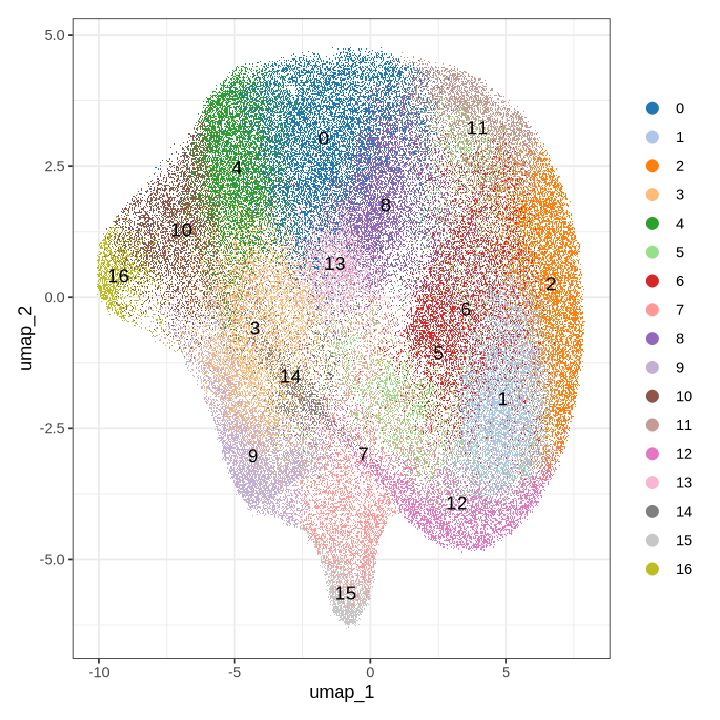

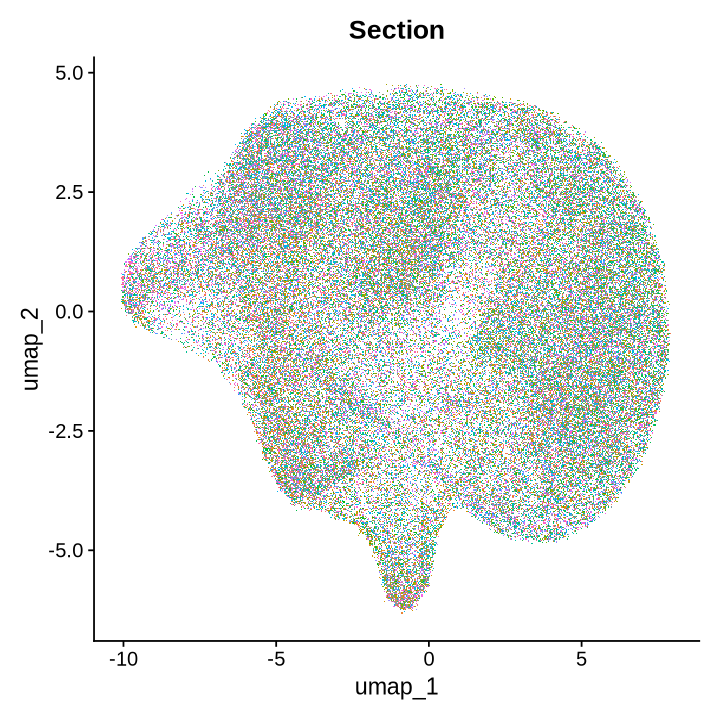

In [47]:
# UMAP of tile cllusters shows good mixing across samples. 
fig.size(6,6)
DimPlot(obj, label = T) + scale_color_tableau(palette= "Classic 20") + theme_bw()
DimPlot(obj, group.by="Section", shuffle= T) + NoLegend()

In [26]:
# assign unique id to each cell
all_dmt_pts$section_agg_id <- paste0(all_dmt_pts$Section, "_",all_dmt_pts$agg_id)

obj@meta.data$section_agg_id <- paste0(obj@meta.data$Section, "_",obj@meta.data$id)

# merge tile cluster labels with tessera meta data
all_dmt_pts <- left_join(all_dmt_pts, select(obj@meta.data, section_agg_id, seurat_clusters))

In [31]:
Sys.setenv(PROJ_LIB = "/PHShome/mpt34/.conda/envs/test/share/proj")

## Tiles in space and enriched cell types.

Warning message:
“Removed 298 rows containing missing values or values outside the scale range
(`geom_point()`).”


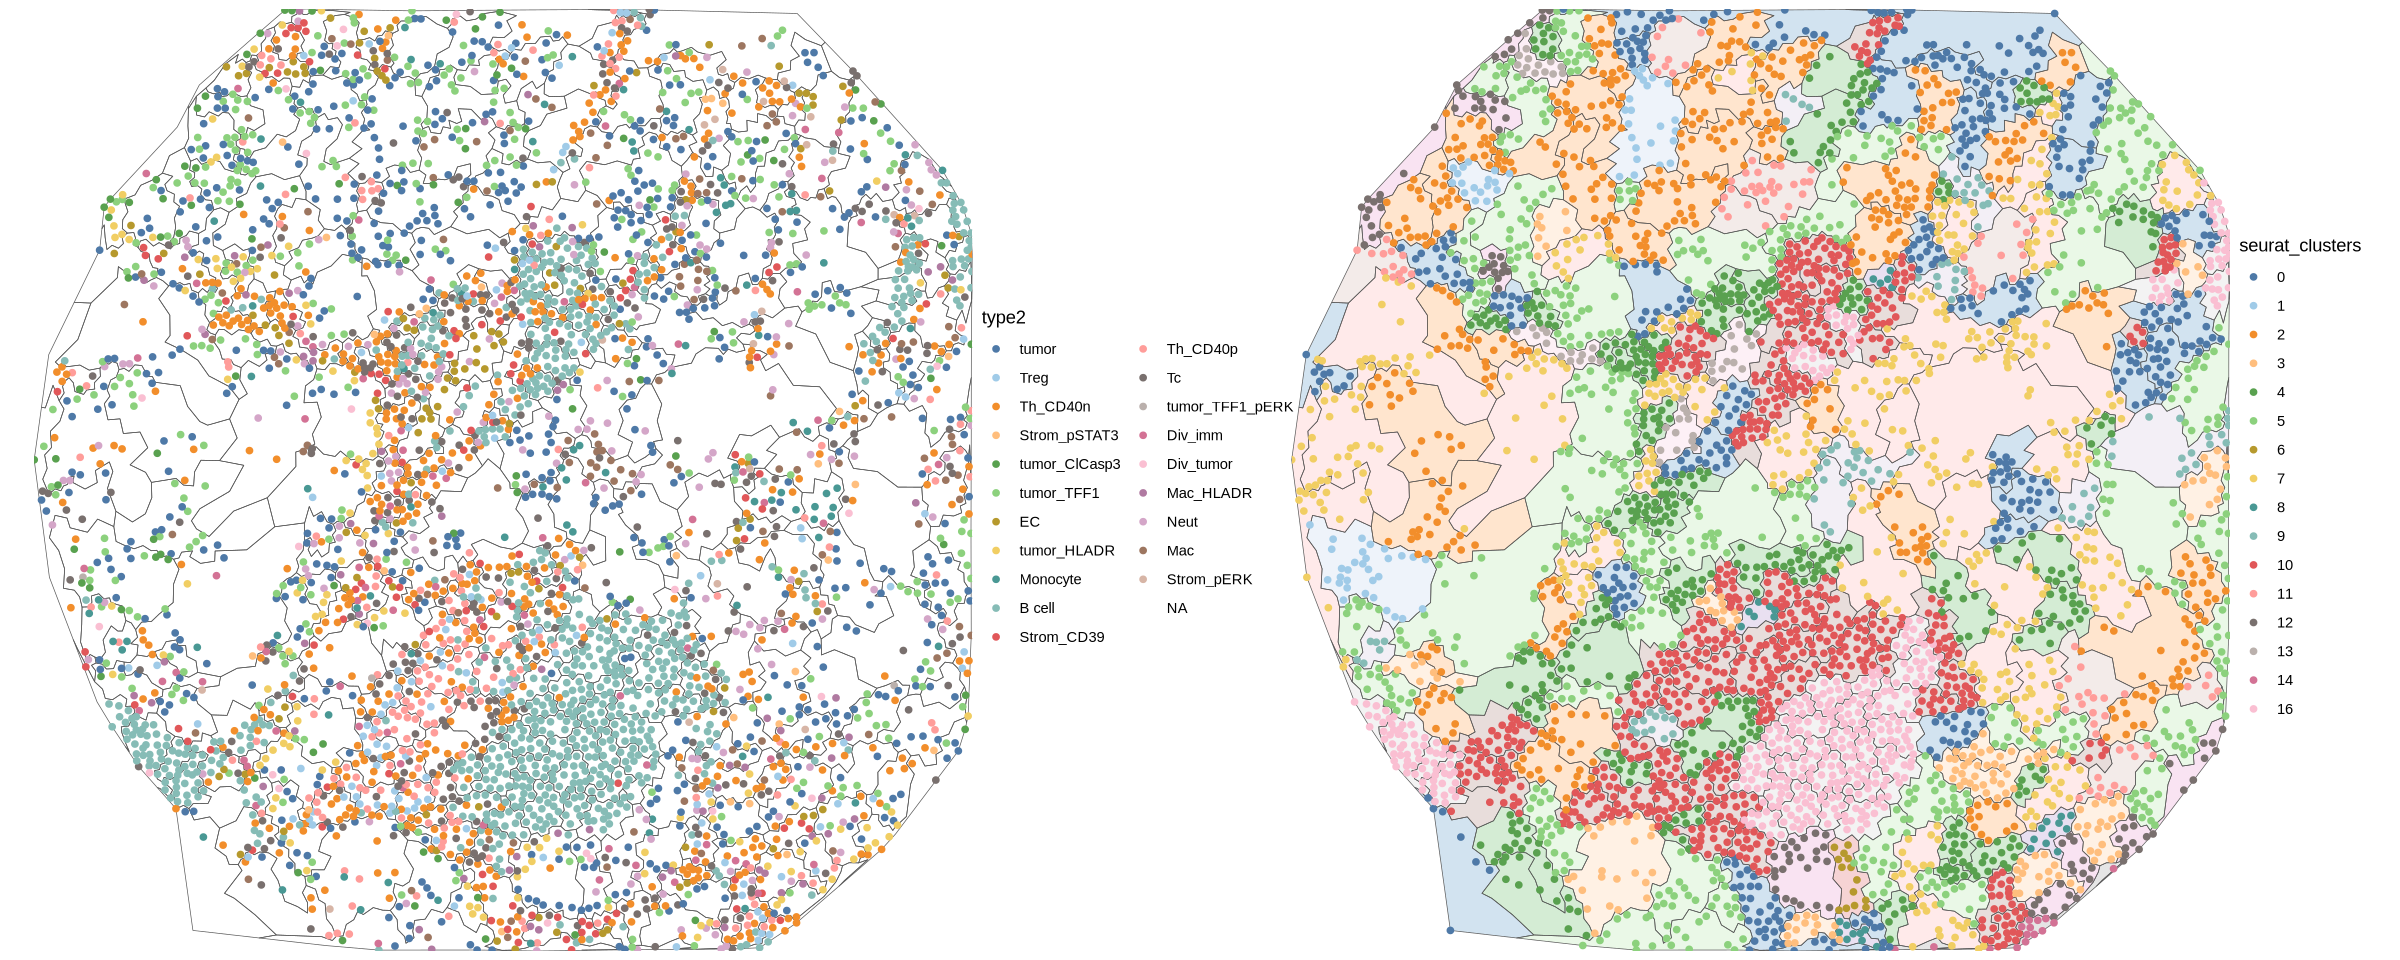

In [32]:
# visualize tile clusters and cell types in space in representative example

sample <- "D091"

p1 = ggplot() + 
    geom_sf(data = obj@meta.data%>% filter(Section == sample), aes(geometry = shape), fill = NA) + 
    geom_point(data = all_dmt_pts%>% filter(Section == sample), aes(X, Y, color = type2)) + 
    scale_color_tableau(palette= "Tableau 20") + 
    theme_void() + 
    coord_sf(expand = FALSE) + 
    NULL
p2 = ggplot() + 
    geom_sf(data = obj@meta.data%>% filter(Section == sample), aes(geometry = shape, fill = seurat_clusters), alpha = .2) + 
    geom_point(data = all_dmt_pts%>% filter(Section == sample), aes(X, Y, color = seurat_clusters)) + 
    scale_color_tableau('Tableau 20') + 
    scale_fill_tableau('Classic 20') + 
    theme_void() + 
    guides(fill = 'none') + 
    coord_sf(expand = FALSE) + 
    NULL
fig.size(8, 20)
p1 | p2

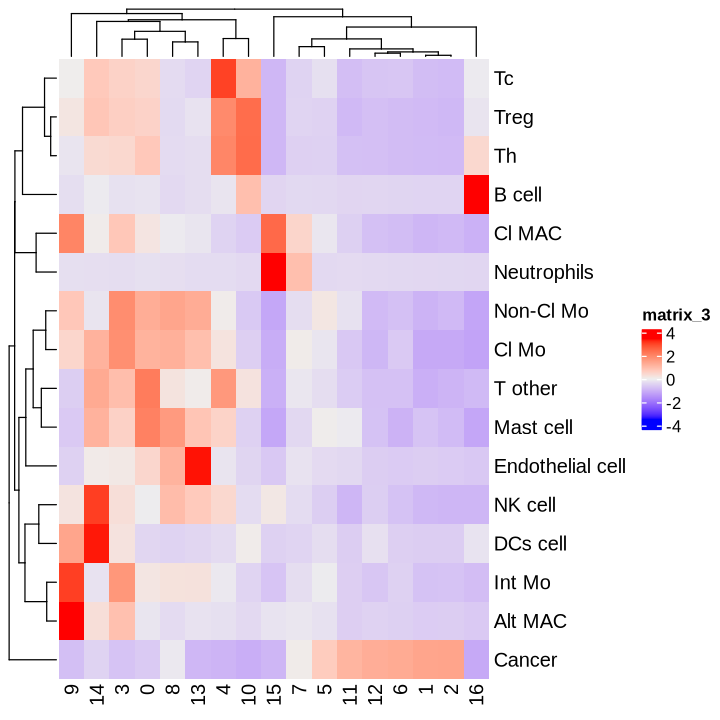

In [35]:
# enrichment of celltypes (original labels) in tile clusters
fig.size(6, 6)
all_dmt_pts %>% 
    with(table(type, seurat_clusters)) %>% 
    prop.table(2) %>% 
    t %>% scale %>% t %>% 
    Heatmap()

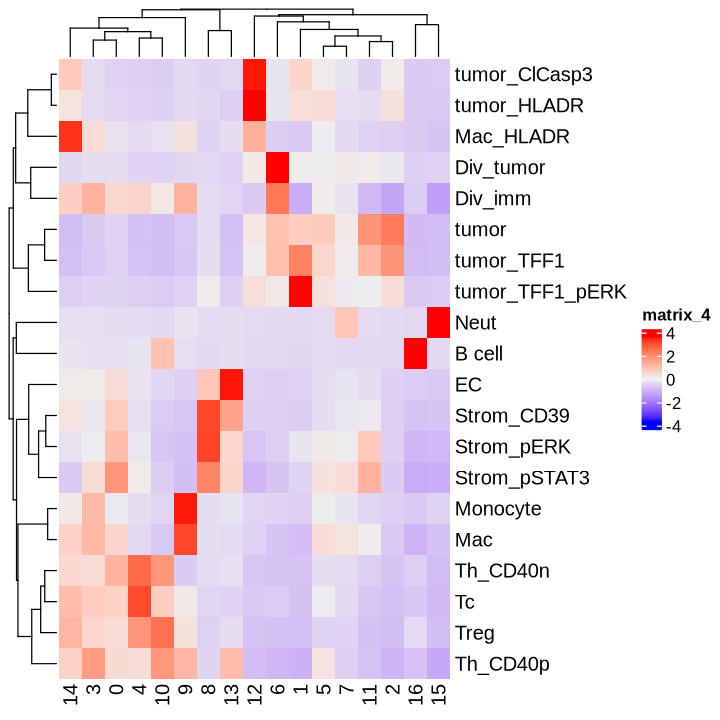

In [36]:
# enrichment of celltypes (new labels) in tile clusters
all_dmt_pts %>% 
    with(table(type2, seurat_clusters)) %>% 
    prop.table(2) %>% 
    t %>% scale %>% t %>% 
    Heatmap()

In [43]:
saveRDS(obj, "full_panel_luad_tile_cluster_seur.rds")
saveRDS(all_dmt_pts, "full_panel_luad_tile_cluster_pts.rds")